In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

In [56]:
# Highlight - highlights text in shell. Returns plain if colour doesn't exist.
def highlight(colour, text):
    if colour == "red":
        return "\033[1;41m" + str(text) + "\033[1;m"
    if colour == "green":
        return "\033[1;42m" + str(text) + "\033[1;m"
    if colour == "yellow":
        return "\033[1;43m" + str(text) + "\033[1;m"
    if colour == "blue":
        return "\033[1;44m" + str(text) + "\033[1;m"
    if colour == "magenta":
        return "\033[1;45m" + str(text) + "\033[1;m"
    if colour == "cyan":
        return "\033[1;46m" + str(text) + "\033[1;m"
    if colour == "gray":
        return "\033[1;47m" + str(text) + "\033[1;m"
    return str(text)

# Highlight sentence
def highlightSentence(sentence, query, color):
    regex = re.compile(query, re.I)
    return regex.sub(highlight(color, query), sentence)

# Text Preprocessing
def preprocess_text(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    text = text.lower()
    text = re.sub(r'[^a-z.#_\\]', ' ', text)
    text = text.split()
    Lemm = [wordnet_lemmatizer.lemmatize(x) for x in text]
    Lemm = " ".join(Lemm)
    return Lemm


In [57]:
def Happy_Holi(doc, query):
    image = cv2.imread("holi/jpg.jpg")
    img = plt.imshow(image, interpolation='nearest')
    img.set_cmap('hot')
    plt.axis('off')

    query = preprocess_text(query)
    query = query.split(" ")
    color_list = ['blue', 'red', 'green', 'yellow', 'cyan' , 'magenta']  
    for i in query:
        color = random.choice(color_list)
        if i == "." or len(i)==1 or len(i)==2:
            continue
        doc = highlightSentence(doc, i.lower(), color)
        doc = copy.deepcopy(doc)

    print(doc)

In [60]:
doc = """
India is a country of diverse customs and vibrant culture. Many of them are considered unconventional, 
a little bit rare or even weird, but one tradition and national holiday really represent a pure spectacle.
Holi is a Hindu festival that is held every year in spring, accompanied by many religious beliefs as well 
as fantastic stories about the appearance of this folk custom. Holi is a celebration that is maintained 
throughout India, during the last full moon according to the Hindu lunar calendar and usually takes place 
in March.

Festival is gathering of people from all over the country, different social statuses and ages. The celebration 
involves music and dancing with the custom that the participants splash on each other with powdered colors and 
water. The enjoyment and delight of this event have become a global phenomenon, and people around the world gladly 
repeat this Indian ritual, especially with young, during the music festivals and parties. You can notice the Holi 
tradition in many music videos, advertisements by the most famous hi-tech companies, because, what could document 
better the full HD resolution from the beautiful clouds of various colors or smiling people?

There is an old Hindu belief that evil King hiranyakashayap was a demon who wanted to rule the universe.
His son Prahlad deviated from his father and turned to God Vishnu, the protector of the universe. Anger over 
betrayal, the king made a pack with his sister, the demon of Holika, to kill Prahlad. The plan was for the 
boy to sit in her lap when she spilled the flame over him. Holika was a daemon, and fire couldn’t harm her.
Still, Vishnu protected the boy, and Holika burned alone in death. Prahlad became the king.

"""

query = """
Holi is Hindu festival, is held every year in spring. Celebration involves music, dancing ,
participants splash on each other with powdered colors, water. evil King Hiranyakashayap was a demon
is son Prahlad turned to God Vishnu. king made a pack with his sister, demon of Holika, to kill Prahlad.
Vishnu protected boy,Holika burned alone in death. Prahlad became king.
"""


# Happy Holi


India is a country of diverse customs and vibrant culture. Many of them are considered unconventional, 
a little bit rare or even weird, but one tradition and national holiday really represent a pure spectacle.
holi is a hindu festival that is held every year in spring. accompanied by many religious beliefs as well 
as fantastic stories about the appearance of this folk custom. holi is a celebration that is maintained 
throughout India, during the last full moon according to the hindu lunar calendar and usually takes place 
in March.

festival is gathering of people from all over the country, different social statuses and ages. The celebration 
involves music and dancing with the custom that the participants splash on each other with powdered colors and 
water. The enjoyment and delight of this event have become a global phenomenon, and people around the world gladly 
repeat this Indian ritual, especially with young, during the music festivals and parties. You can notice the holi 
tra

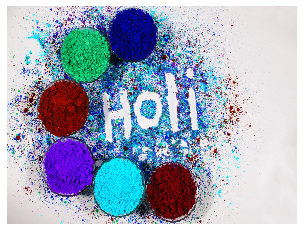

In [61]:
Happy_Holi(doc, query)